# Fingerprint Plotting

This notebook has 4 main parts:

1. [4 Qubits all circuits](#4q---all-circuits)
2. [4 Qubits individual circuits](#4q-for-each-circuit-type-fect)
3. [8 Qubits all circuits](#8q---all-circuits)
4. [16 Qubits all circuits](#16q---all-circuits)


### Imports

In [1]:
import sys
sys.path.append('../../')

from investigation_functions import data_process_funcs as dpf
from investigation_functions import similarity_funcs as smlf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.colors as mcolors

### Getting starting data

In [2]:
df_4q_H = dpf.get_expanded_df(
    'Hardware',4,dir_ = '../../../',processed = False, updated_results=True)
df_4q_H = df_4q_H.drop(['0000'],axis =1)
df4qH_t = df_4q_H[df_4q_H['backend']=='torino']
df4qH_b = df_4q_H[df_4q_H['backend']=='brisbane']
df4qH_m = df_4q_H[df_4q_H['backend']=='marrakesh']
df4qH_f = df_4q_H[df_4q_H['backend']=='fez']

In [3]:
mean_t = dpf.find_mean_cols(df4qH_t)
print(mean_t)
mean_b = dpf.find_mean_cols(df4qH_b)
mean_f = dpf.find_mean_cols(df4qH_f)
mean_m = dpf.find_mean_cols(df4qH_m)

0001    392.549708
0010    224.543860
0011     65.116959
0100     62.672515
0101     26.561404
0110     12.473684
0111     30.690058
1000     30.146199
1001     16.701754
1010      3.163743
1011      2.520468
1100      3.263158
1101      2.134503
1110      1.514620
1111      3.152047
dtype: float64


## Plotting by circuit

### 4q - all circuits

In [4]:
means = [mean_b,mean_t,mean_f,mean_m]
means_percent =[]
for i in range(len(means)):
    means_percent.append(means[i]*100/4096)

#### Hardware

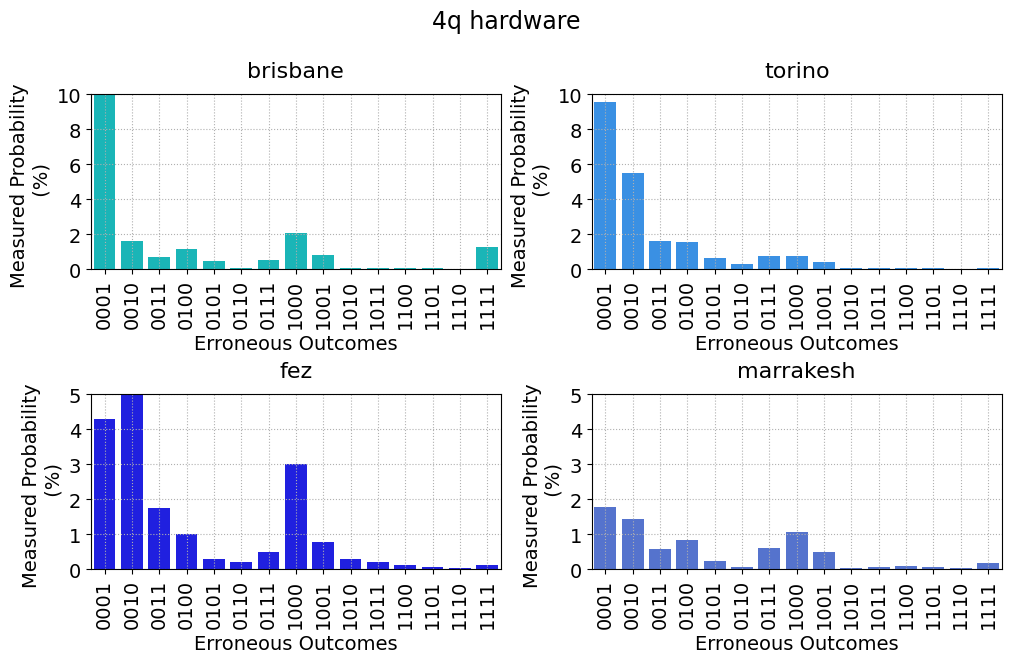

(<Figure size 1000x600 with 4 Axes>,
 [<Axes: title={'center': 'brisbane'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'torino'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'fez'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'marrakesh'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>])

In [5]:
smlf.plot_fingerprints(
    means_percent,
    "4q hardware"
)

#### Old Simulation

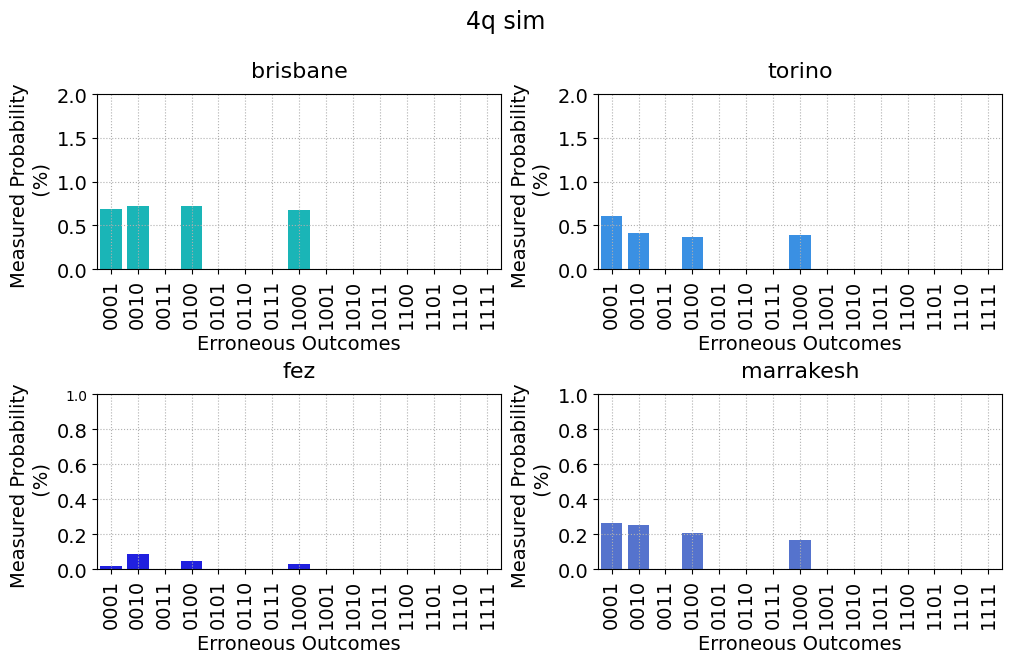

(<Figure size 1000x600 with 4 Axes>,
 [<Axes: title={'center': 'brisbane'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'torino'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'fez'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'marrakesh'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>])

In [8]:
exp_type = 'Simulation'
n_qubits = 4
df_4q_S = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../../../',processed = False, updated_results=True)

means_4qS = smlf.get_err_mean_percents(df_4q_S,n_qubits)

smlf.plot_fingerprints(
    means_4qS,
    "4q sim",
    rows_ylim=[2,1]
)

#### Refreshed Simulation

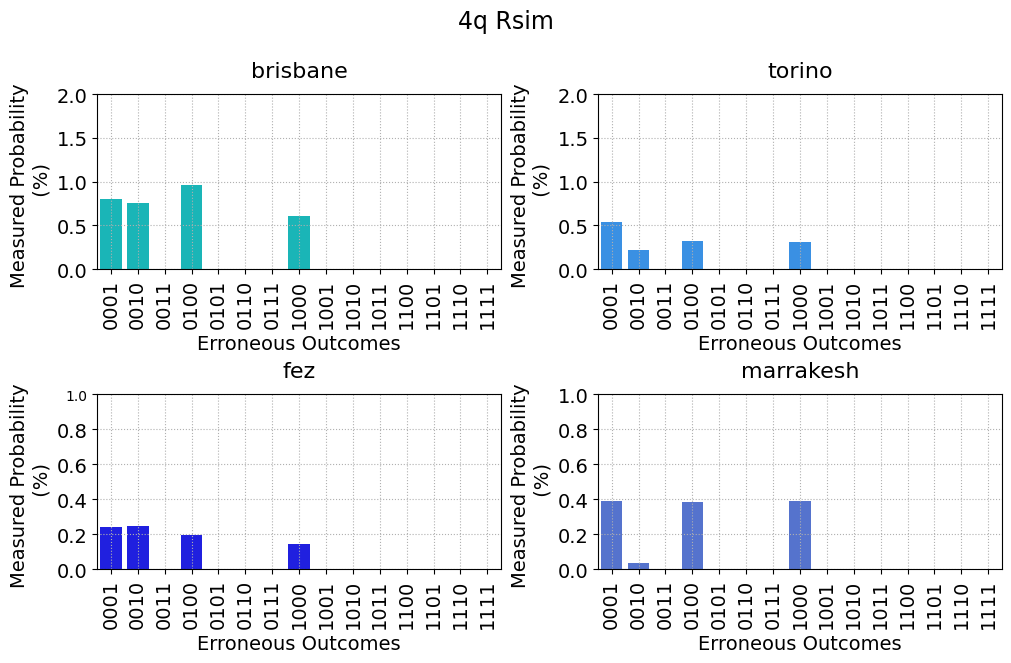

In [10]:
exp_type = 'Refreshed_Simulation'
n_qubits = 4
df_4q_R = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../../../',processed = False, updated_results=True)

means_4qR = smlf.get_err_mean_percents(df_4q_R,n_qubits)

fig,axs=smlf.plot_fingerprints(
    means_4qR,
    "4q Rsim",
    rows_ylim=[2,1]
)


Text(0.5, 0.01, 'Erroneous Outcomes')

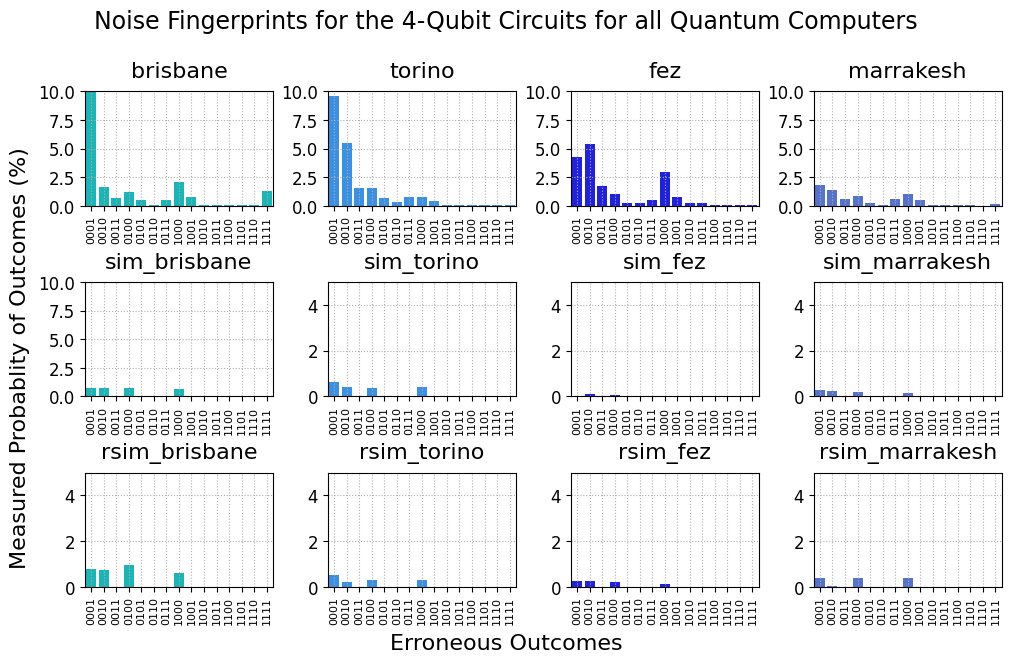

In [ ]:

fig,axs=smlf.plot_fingerprints(
    means_percent + means_4qS + means_4qR,
    "Noise Fingerprints for the 4-Qubit Circuits for all Quantum Computers",
    backends = [
        'brisbane','torino','fez','marrakesh',
        'sim_brisbane','sim_torino','sim_fez','sim_marrakesh',
        'rsim_brisbane','rsim_torino','rsim_fez','rsim_marrakesh'
    ],
    y_labels='',
    x_labels='',
    n_cols=4,
    n_rows=3,
    y_label_size=12,
    x_label_size=12,
    x_tick_size=8,
    show_plot=False
    # sharey_by_row=True
)

fig.supylabel('Measured Probablity of Outcomes (%)', fontsize=16)
fig.supxlabel('Erroneous Outcomes', fontsize=16)

### 4q for each circuit type (fect)

#### Hardware

In [11]:
c1_4qH = df_4q_H[df_4q_H['circuit_type']=='1']
c2_4qH = df_4q_H[df_4q_H['circuit_type']=='2']
c3_4qH = df_4q_H[df_4q_H['circuit_type']=='3']

means_c1 = smlf.get_err_mean_percents(c1_4qH,drop_0th=False)
means_c2 = smlf.get_err_mean_percents(c2_4qH,drop_0th=False)
means_c3 = smlf.get_err_mean_percents(c3_4qH,drop_0th=False)

means_fect = means_c1 + means_c2 + means_c3


Text(0.5, 0.01, 'Erroneous Outcomes')

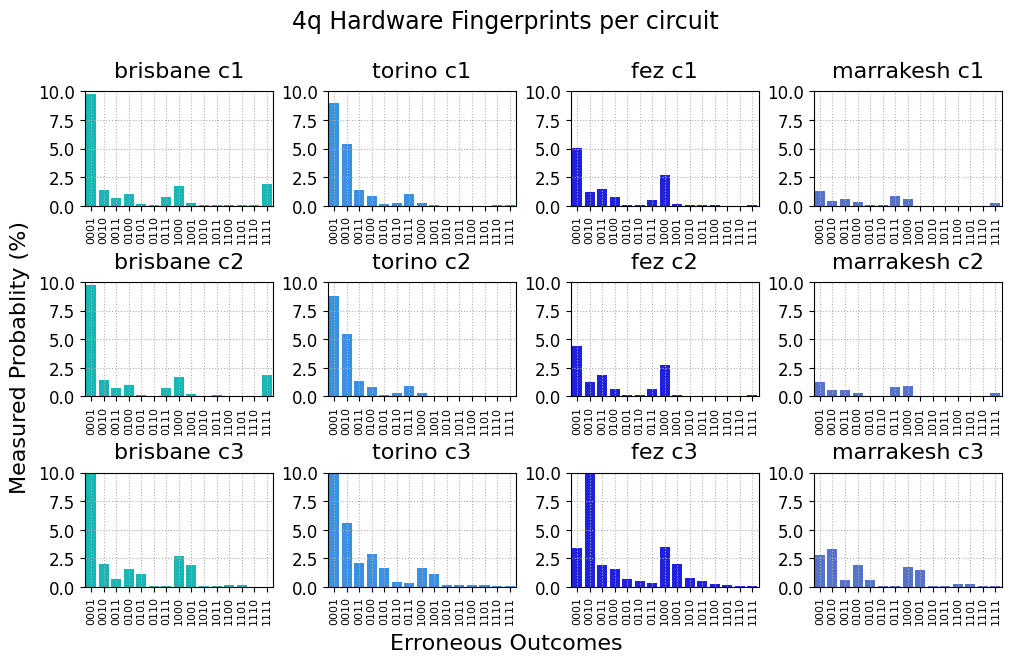

In [12]:
fig,axs=smlf.plot_fingerprints(
    means_fect,
    "4q Hardware Fingerprints per circuit",
    backends = [
        'brisbane c1','torino c1','fez c1','marrakesh c1',
        'brisbane c2','torino c2','fez c2','marrakesh c2',
        'brisbane c3','torino c3','fez c3','marrakesh c3'
    ],
    y_labels='',
    x_labels='',
    n_cols=4,
    n_rows=3,
    y_label_size=12,
    x_label_size=12,
    x_tick_size=8,
    show_plot=False,
    rows_ylim=[10,10]
    # sharey_by_row=True
)

fig.supylabel('Measured Probablity (%)', fontsize=16)
fig.supxlabel('Erroneous Outcomes', fontsize=16)

#### Refreshed Simulated

In [13]:
cs_R4 = smlf.split_df_by_circuit_type(df_4q_R)
means_fect_R4 =[]
for c in cs_R4:
    means_fect_R4=means_fect_R4+smlf.get_err_mean_percents(c,nr_qubits=4,drop_0th=False)
# means_fect = means_c1 + means_c2 + means_c3

Text(0.5, 0.01, 'Erroneous Outcomes')

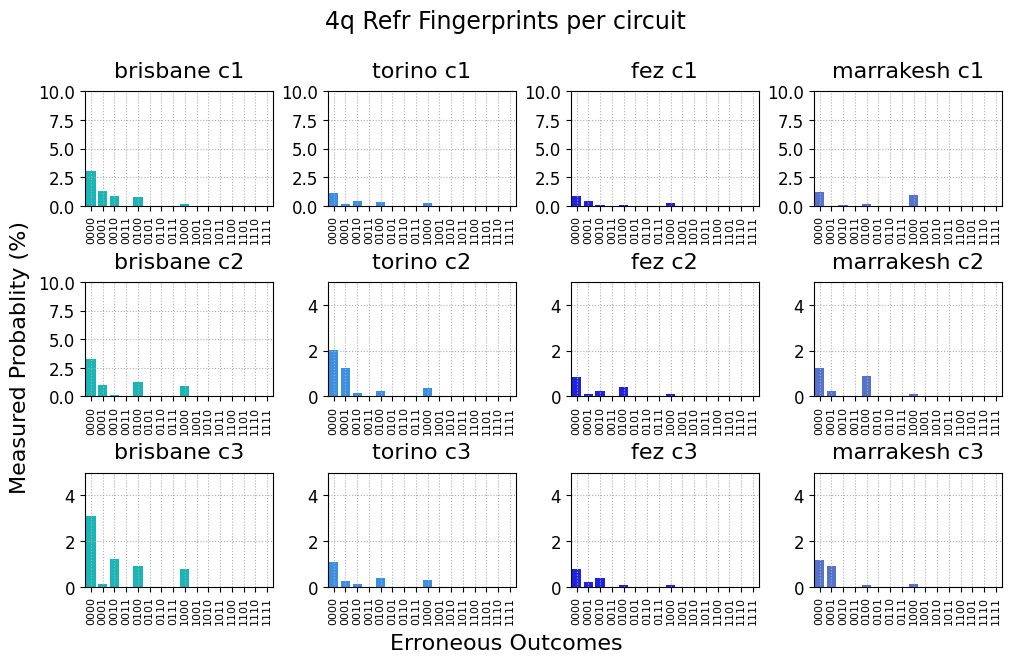

In [14]:
fig,axs=smlf.plot_fingerprints(
    means_fect_R4,
    "4q Refr Fingerprints per circuit",
    backends = [
        'brisbane c1','torino c1','fez c1','marrakesh c1',
        'brisbane c2','torino c2','fez c2','marrakesh c2',
        'brisbane c3','torino c3','fez c3','marrakesh c3'
    ],
    y_labels='',
    x_labels='',
    n_cols=4,
    n_rows=3,
    y_label_size=12,
    x_label_size=12,
    x_tick_size=8,
    show_plot=False
    # sharey_by_row=True
)

fig.supylabel('Measured Probablity (%)', fontsize=16)
fig.supxlabel('Erroneous Outcomes', fontsize=16)

### 8q - all circuits

#### Hardware

In [15]:
exp_type = 'Hardware'
n_qubits = 8
df_8q_H = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../../../',processed = False, updated_results=True)

means_8qH = smlf.get_err_mean_percents(df_8q_H,n_qubits)


c:\Users\epste\anaconda3\envs\qiskE\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


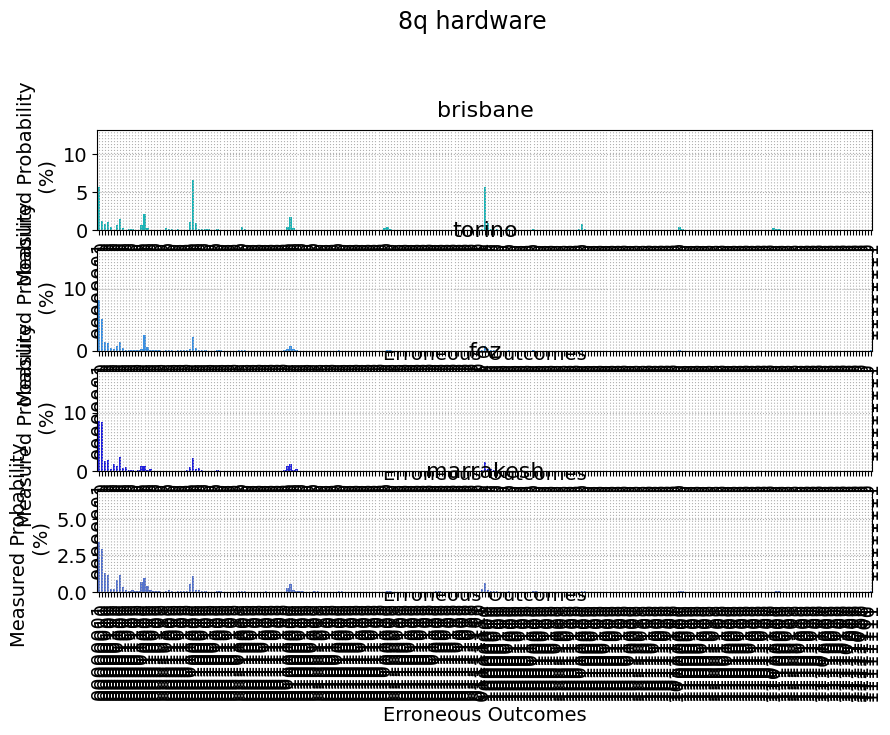

(<Figure size 1000x600 with 4 Axes>,
 [<Axes: title={'center': 'brisbane'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'torino'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'fez'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'marrakesh'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>])

In [16]:

smlf.plot_fingerprints(
    means_8qH,
    "8q hardware",
    n_rows = 4,
    n_cols =1,
    sharey_by_row=False
)

Try plotting values only above a certian threshold:

In [17]:
means_above_p5 =[]
for mean in means_8qH:
    high_mean =mean[mean>=0.5]
    means_above_p5.append(high_mean)
    # print(high_mean)


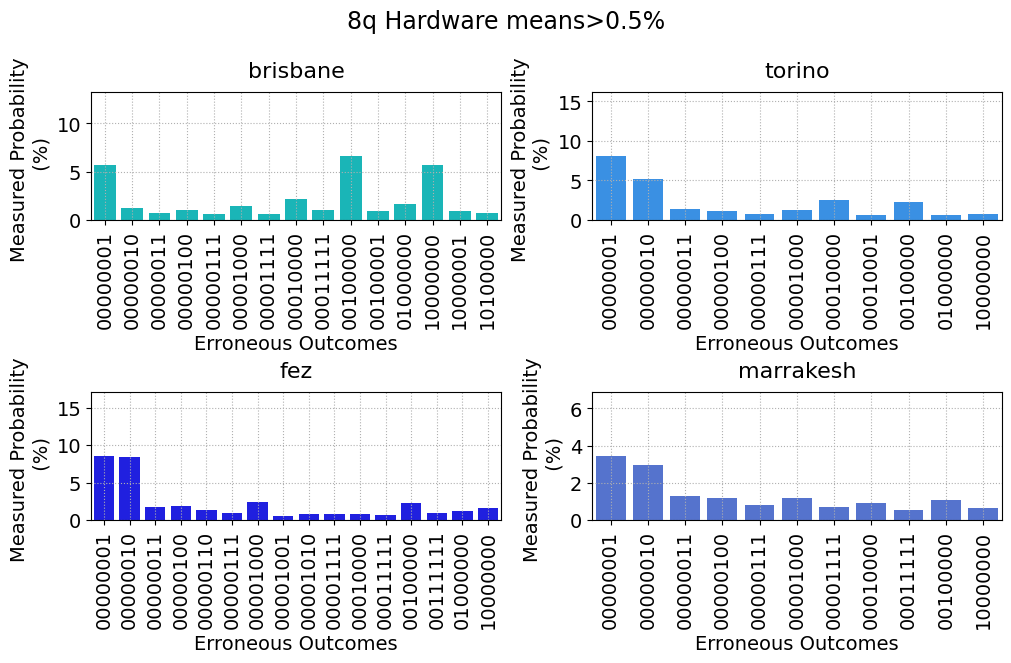

(<Figure size 1000x600 with 4 Axes>,
 [<Axes: title={'center': 'brisbane'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'torino'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'fez'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>,
  <Axes: title={'center': 'marrakesh'}, xlabel='Erroneous Outcomes', ylabel='Measured Probability \n (%)'>])

In [ ]:
smlf.plot_fingerprints(
    means_above_p5,
    "8q Hardware means>0.5%",
    colour_wrap = 4,
    sharey_by_row=False
    # share_x_all=False
)

#### Simulation

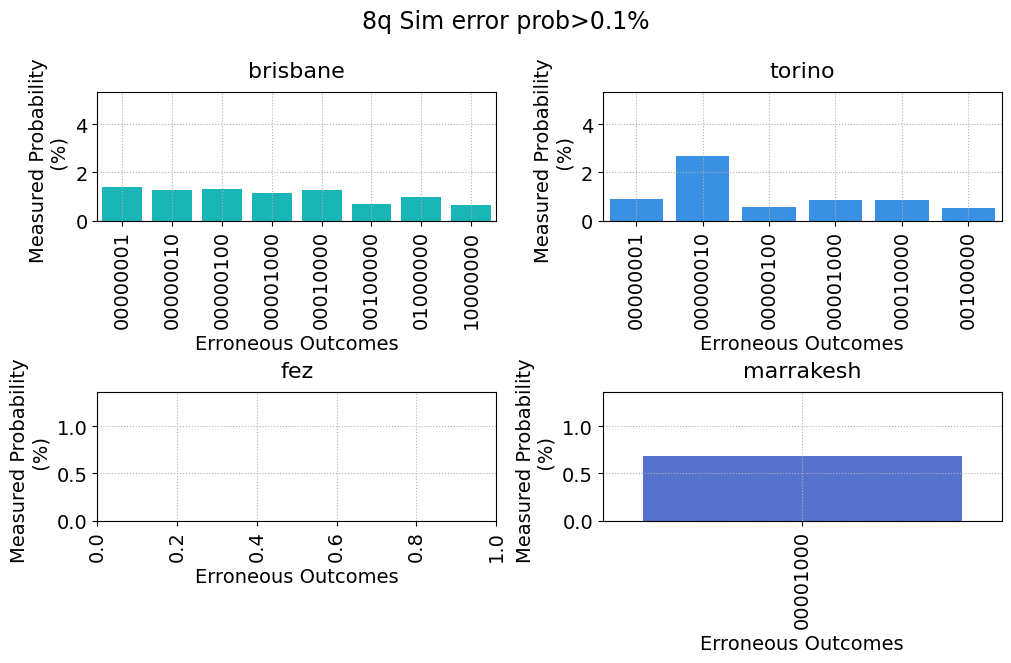

In [ ]:
exp_type = 'Simulation'
n_qubits = 8
min_percent = 0.1
df_8q_S = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_8qS = smlf.get_err_mean_percents(df_8q_S,n_qubits)

smlf.plot_fingerprints(
    smlf.get_means_above(means_8qS,min_percent),
    "8q Sim error prob>0.1%",
)

#### Refreshed Simulation

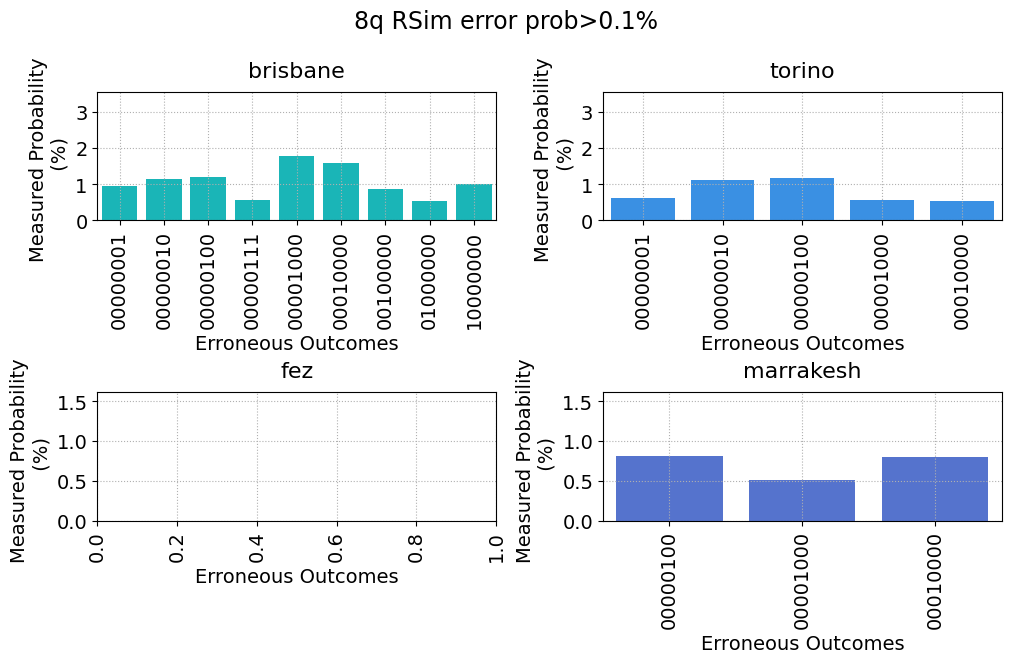

In [ ]:
exp_type = 'Refreshed_Simulation'
n_qubits = 8
min_percent = 0.1
df_8q_R = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_8qR = smlf.get_err_mean_percents(df_8q_R,n_qubits)

smlf.plot_fingerprints(
    smlf.get_means_above(means_8qR,min_percent),
    "8q RSim error prob>0.1%",
)

### 16q - all circuits

#### Hardware

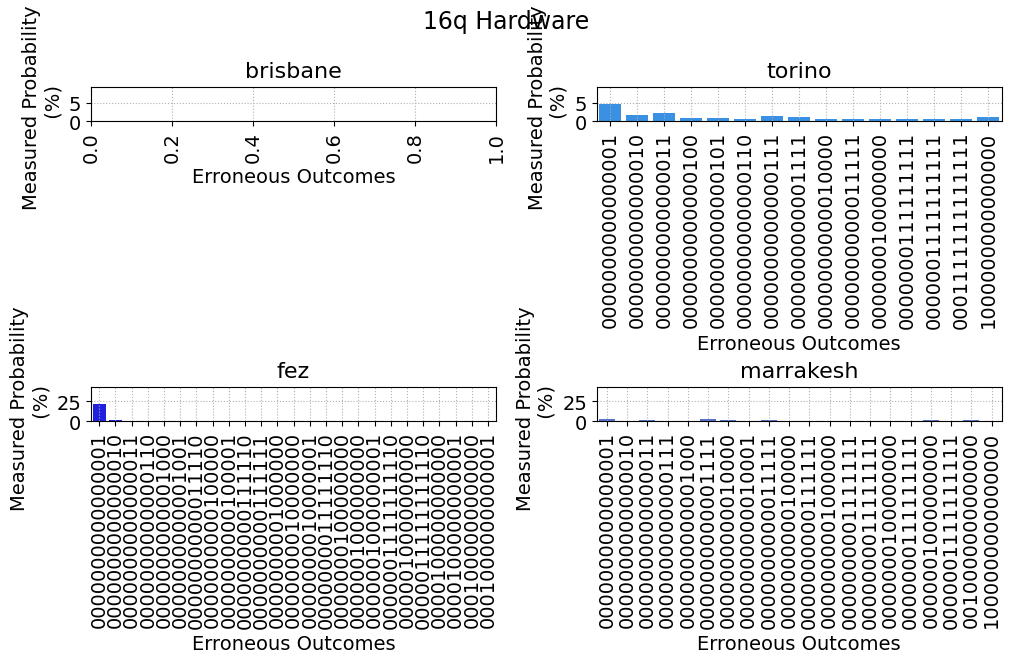

In [ ]:
exp_type = 'Hardware'
n_qubits = 16
min_percent = 0.5
df_16q_H = dpf.get_expanded_df(
    exp_type,n_qubits,dir_ = '../',processed = False, updated_results=True)
means_16qH = smlf.get_err_mean_percents(df_16q_H,n_qubits)

smlf.plot_fingerprints(
    smlf.get_means_above(means_16qH,min_percent),
    "16q Hardware"
)


c:\Users\RAMEE\Desktop\VS\Python_Environments\env1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


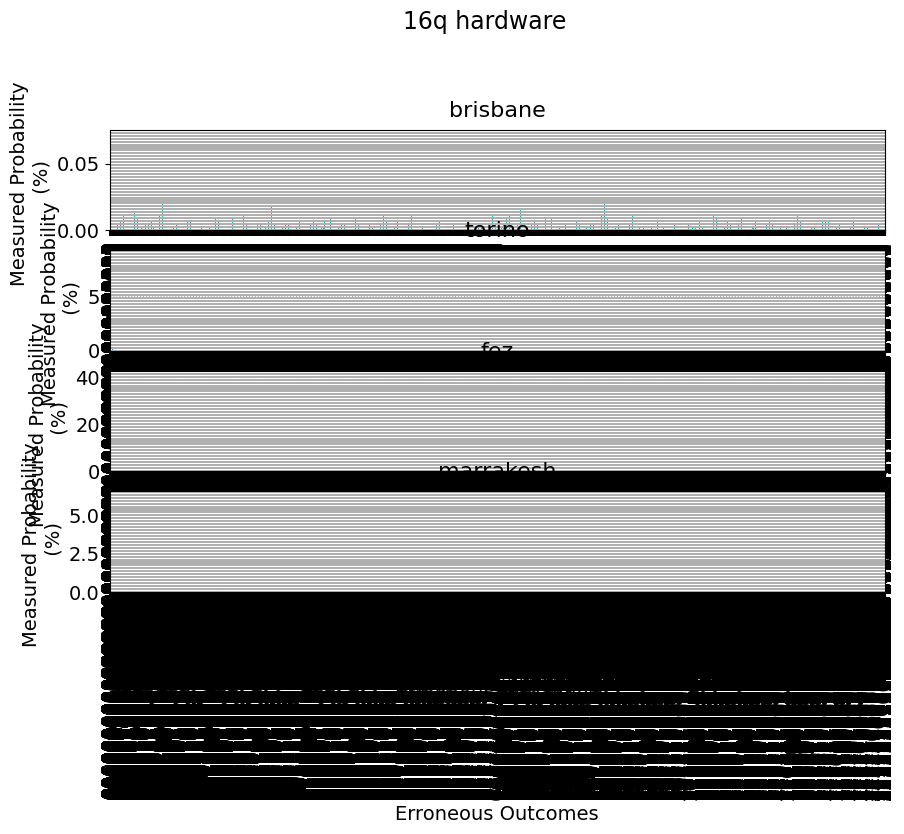

In [ ]:

smlf.plot_fingerprints(
    means_16qH,
    "16q hardware",
    n_rows = 4,
    n_cols =1,
    sharey_by_row=False
)

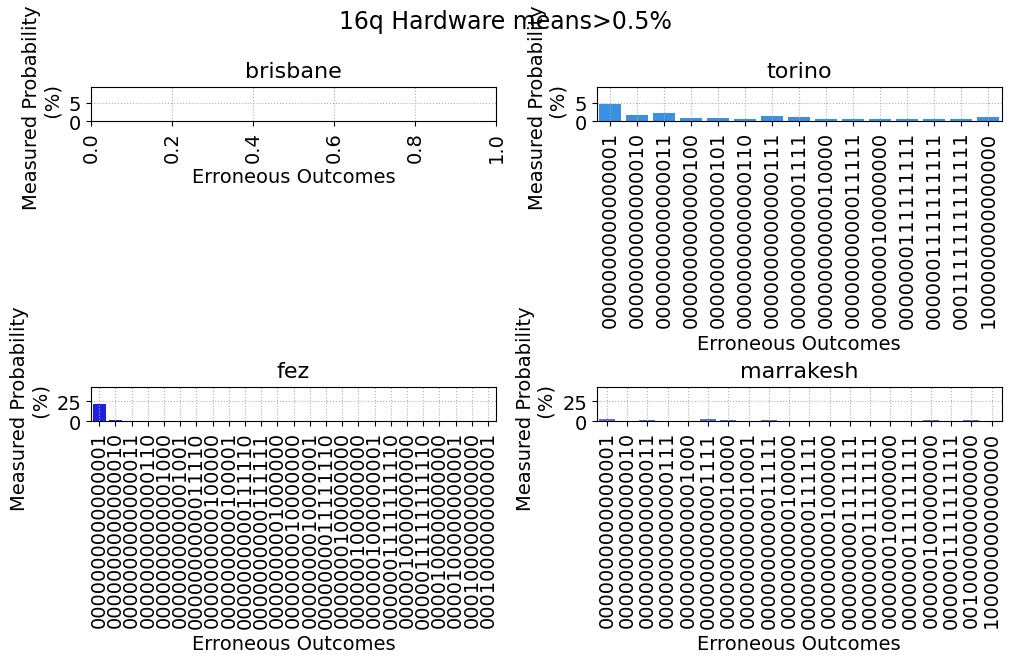

In [ ]:
means_above_p5_16qH =[]
for mean in means_16qH:
    high_mean =mean[mean>=0.5]
    means_above_p5_16qH.append(high_mean)
    # print(high_mean)
smlf.plot_fingerprints(
    means_above_p5_16qH,
    "16q Hardware means>0.5%"
)